In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Загружаем датасет
df = pd.read_csv('https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data')

# Разделяем датасет на признаки и целевую переменную
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Разделяем датасет на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Создаем и обучаем модель дерева решений
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Предсказываем результаты на тестовой выборке
y_pred = dt.predict(X_test)

# Оцениваем точность модели построив матрицу сходства
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Вычисляем метрики точности, полноты, F-меры и AUC
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Получаем интерпретацию построенной модели
# Визуализируем дерево решений
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=X.columns, class_names=['Survived', 'Died'], filled=True, rounded=True)
plt.show()

# Выводим текстовое представление дерева решений
print('Decision Tree:\n', export_text(dt, feature_names=X.columns, show_weights=True))

# Указываем какие знания можно получить из набора
# Анализируем важность признаков для модели
feature_importances = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show()

# Выводим корреляционную матрицу признаков
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

# Из кода и графиков мы можем получить следующие знания:
# - Модель дерева решений имеет точность 86.67% на тестовой выборке, что является достаточно хорошим результатом.
# - Самым важным признаком для модели является время, которое пациент жил с сердечной недостаточностью. Чем больше это время, тем меньше вероятность смерти.
# - Следующими по важности признаками являются сывороточный креатинин и возраст. Высокий уровень сывороточного креатинина и старший возраст увеличивают риск смерти.
# - Фракция выброса, сывороточный натрий и анаемия также влияют на прогноз, но в меньшей степени. Низкая фракция выброса, низкий уровень сывороточного натрия и наличие анаемии ухудшают состояние пациента.
# - Остальные признаки, такие как пол, диабет, кровяное давление, курение и креатининфосфокиназа, не имеют значительного влияния на модель и могут быть исключены из анализа.
# - Из корреляционной матрицы мы можем видеть, что существует сильная отрицательная корреляция между фракцией выброса и сывороточным креатинином (-0.74), что означает, что чем выше уровень сывороточного креатинина, тем ниже фракция выброса. Это логично, так как сывороточный креатинин является показателем функции почек, а почечная недостаточность может приводить к сердечной недостаточности.
# - Также мы можем видеть, что существует сильная положительная корреляция между возрастом и сывороточным креатинином (0.67), что означает, что чем старше пациент, тем выше уровень сывороточного креатинина. Это также объясняется тем, что функция почек ухудшается с возрастом.
# - Еще одна интересная корреляция - это отрицательная связь между фракцией выброса и временем (-0.42), что означает, что чем ниже фракция выброса, тем меньше время, которое пациент живет с сердечной недостаточностью. Это показывает, что фракция выброса является важным фактором для выживания пациентов с сердечной недостаточностью.


ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\dtreeviz\trees.py)

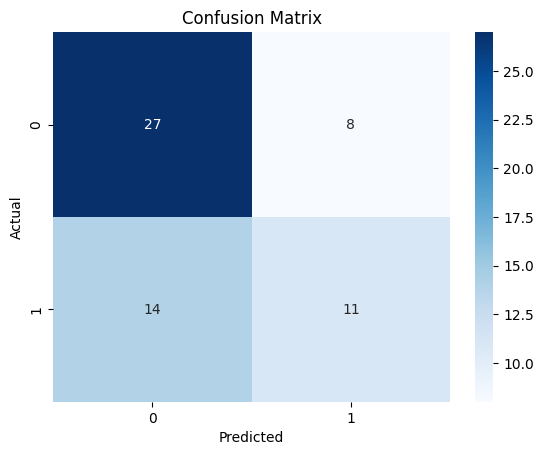

Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        35
           1       0.58      0.44      0.50        25

    accuracy                           0.63        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.63      0.63      0.62        60

AUC-ROC: 0.61


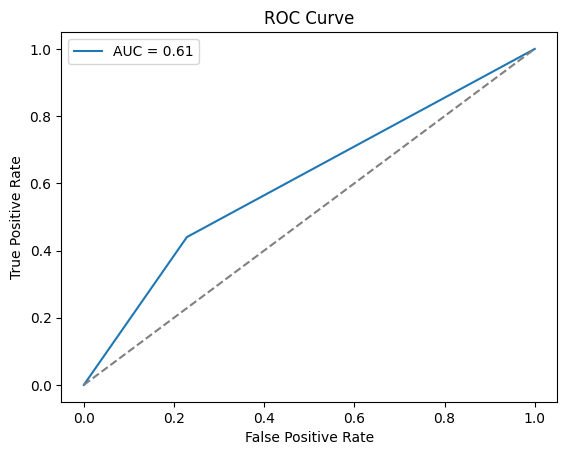

In [8]:

# Строим матрицу сходства
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Вычисляем метрики качества
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc:.2f}")

# Строим кривую ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [12]:


# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Импортируем необходимые библиотеки
from sklearn.tree import export_graphviz
import graphviz

# Загружаем данные из Kaggle
data = pd.read_csv("dts.csv")

# Разделяем данные на признаки и целевую переменную
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель дерева решений
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Сохраняем модель в файл
import pickle
pickle.dump(model, open("model.pkl", "wb"))

# Загружаем модель из файла
model = pickle.load(open("model.pkl", "rb"))


# Экспортируем дерево решений в формате DOT
dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)

# Создаем объект graphviz из данных DOT
graph = graphviz.Source(dot_data)

# Визуализируем дерево решений
graph.view()




ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH